# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [97]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [98]:
df_train.sample(10)

name  year  selling_price  \
5020          Hyundai i20 Active 1.4 SX with AVN  2017         715000   
1034               Mahindra Bolero 2011-2019 ZLX  2012         450000   
2993         Hyundai i20 Active 1.4 SX Dual Tone  2015         580000   
2090                    Honda City 2017-2020 GXi  2006         270000   
1476           Hyundai Grand i10 1.2 CRDi Sportz  2017         450000   
6967  Hyundai i20 2015-2017 Asta Option 1.4 CRDi  2017         780000   
5376           Mahindra KUV 100 D75 K6 Plus 5Str  2016         390000   
4858                             Tata Indica DLX  2003          40000   
1342               Hyundai Grand i10 Nios Sportz  2019         550000   
5105               Mahindra Scorpio 1.99 S10 4WD  2008         450000   

      km_driven    fuel       seller_type transmission         owner  \
5020      60000  Diesel        Individual       Manual   First Owner   
1034     165000  Diesel        Individual       Manual   First Owner   
2993      74000  Diesel        Individual       Manual  Second Owner   
2090      70000  Petrol        Individual       Manual  Second Owner   
1476      56290  Diesel            Dealer       Manual   First Owner   
6967      28000  Diesel        Individual       Manual   First Owner   
5376      62000  Diesel            Dealer       Manual   First Owner   
4858      70000  Diesel        Individual       Manual   First Owner   
1342       4701  Petrol  Trustmark Dealer       Manual   First Owner   
5105      78000  Diesel            Dealer       Manual   First Owner   

         mileage   engine  max_power                  torque  seats  
5020  21.19 kmpl  1396 CC  88.73 bhp  219.66nm@ 1500-2750rpm    5.0  
1034  15.96 kmpl  2523 CC   62.1 bhp     195Nm@ 1400-2200rpm    7.0  
2993  21.19 kmpl  1396 CC  88.73 bhp  219.66nm@ 1500-2750rpm    5.0  
2090   17.7 kmpl  1497 CC     78 bhp   12.7@ 2,700(kgm@ rpm)    5.0  
1476   24.0 kmpl  1186 CC  73.97 bhp  190.24nm@ 1750-2250rpm    5.0  
6967  22.54 kmpl  1396 CC  88.73 bhp   219.7Nm@ 1500-2750rpm    5.0  
5376  25.32 kmpl  1198 CC     77 bhp     190Nm@ 1750-2250rpm    5.0  
4858         NaN      NaN        NaN                     NaN    NaN  
1342   20.7 kmpl  1197 CC  81.86 bhp       113.75Nm@ 4000rpm    5.0  
5105   15.4 kmpl  1997 CC    120 bhp     280Nm@ 1800-2800rpm    7.0

In [99]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [100]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [101]:
print(f'В датасете test {df_test.duplicated().sum()} дубликат(а/ов)')
print(f'В датасете train {df_train.duplicated().sum()} дубликат(а/ов)')

В датасете test 62 дубликат(а/ов)
В датасете train 985 дубликат(а/ов)


In [102]:
#df_train = df_train.drop_duplicates()
#df_test = df_test.drop_duplicates()

miss_columns_train = df_train.columns[df_train.isnull().any()]
print("Колонки с пропущенными значениями в train:")
print(*miss_columns_train, sep = ', ')
miss_columns_test = df_test.columns[df_test.isnull().any()]
print("Колонки с пропущенными значениями в train:")
print(*miss_columns_test, sep = ', ')

Колонки с пропущенными значениями в train:
mileage, engine, max_power, torque, seats
Колонки с пропущенными значениями в train:
mileage, engine, max_power, torque, seats


In [103]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))
df_train['engine'] = df_train['engine'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))
df_train['max_power'] = df_train['max_power'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))

df_test['mileage'] = df_test['mileage'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))
df_test['engine'] = df_test['engine'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))
df_test['max_power'] = df_test['max_power'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))


In [104]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
median_mileage = df_train[df_train['mileage'] != np.nan]['mileage'].median()
df_train['engine'] = df_train['engine'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
median_engine = df_train[df_train['engine'] != np.nan]['engine'].median()
df_train['max_power'] = df_train['max_power'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
median_max_power = df_train[df_train['max_power'] != np.nan]['max_power'].median()

In [105]:
df_train['mileage'] = df_train['mileage'].fillna(median_mileage)
df_train['engine'] = df_train['engine'].fillna(median_engine)
df_train['max_power'] = df_train['max_power'].fillna(median_max_power)

In [106]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
df_test['engine'] = df_test['engine'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
df_test['max_power'] = df_test['max_power'].apply(lambda x: np.nan if len(x) <= 1 else float(x))
df_test['mileage'] = df_test['mileage'].fillna(median_mileage)
df_test['engine'] = df_test['engine'].fillna(median_engine)
df_test['max_power'] = df_test['max_power'].fillna(median_max_power)

In [107]:
median_seats = df_train['seats'].median()
df_train['seats'] = df_train['seats'].fillna(median_seats)
df_test['seats'] = df_test['seats'].fillna(median_seats)

Дашборд

In [108]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df_train, title="Pandas Profiling Report")
profile_report

y


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
profile_report.to_file('Our_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [15]:
# уже заполнил

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [110]:
df_train_without_price = df_train.drop(columns = ['selling_price'])
print(f'В трейне с одинаковым признаковым описанием объектов: {df_train_without_price.duplicated().sum()}')
df_train[df_train_without_price.duplicated()]

В трейне с одинаковым признаковым описанием объектов: 1159


name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power               torque  seats  
254   1197.0      82.00       114Nm@ 4000rpm    5.0  
258   1197.0      85.80       114Nm@ 4000rpm    5.0  
268   1197.0      85.80       114Nm@ 4000rpm    5.0  
324   1999.0     177.00  430Nm@ 1750-2500rpm    5.0  
325   2487.0     214.56  202Nm@ 3600-5200rpm    5.0  
...      ...        ...                  ...    ...  
6947   995.0      62.00      90.3Nm@ 4200rpm    5.0  
6984  1498.0      98.63  215Nm@ 1750-3000rpm    5.0  
6989  1248.0      74.00       190Nm@ 2000rpm    5.0  
6997  1396.0      70.00  140Nm@ 1800-3000rpm    5.0  
6998  1396.0      70.00  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [111]:
df_train = df_train.drop_duplicates(df_train_without_price.columns, keep = 'first')
df_train.reset_index(drop = True, inplace = True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power                     torque  seats  
0         74.00             190Nm@ 2000rpm    5.0  
1        103.52        250Nm@ 1500-2500rpm    5.0  
2         90.00   22.4 kgm at 1750-2750rpm    5.0  
3         88.20      11.5@ 4,500(kgm@ rpm)    5.0  
4         81.86          113.75nm@ 4000rpm    5.0  
...         ...                        ...    ...  
5835      62.10            96.1Nm@ 3000rpm    5.0  
5836      67.10              90Nm@ 3500rpm    5.0  
5837      82.85           113.7Nm@ 4000rpm    5.0  
5838     110.00  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839      73.90             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [112]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [113]:
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [114]:
df_train['engine'].astype(int)
df_train['seats'].astype(int)
df_test['engine'].astype(int)
df_test['seats'].astype(int)

0      7
1      5
2      5
3      5
4      5
      ..
995    5
996    5
997    5
998    5
999    5
Name: seats, Length: 1000, dtype: int64

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [115]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.952905     5.426712  
std      31.577030     0.982344  
min      32.800000     2.000000  
25%      68.000000     5.000000  
50%      82.000000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [116]:
df_train.describe(include = 'object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [117]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [118]:
df_test.describe(include = 'object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [119]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

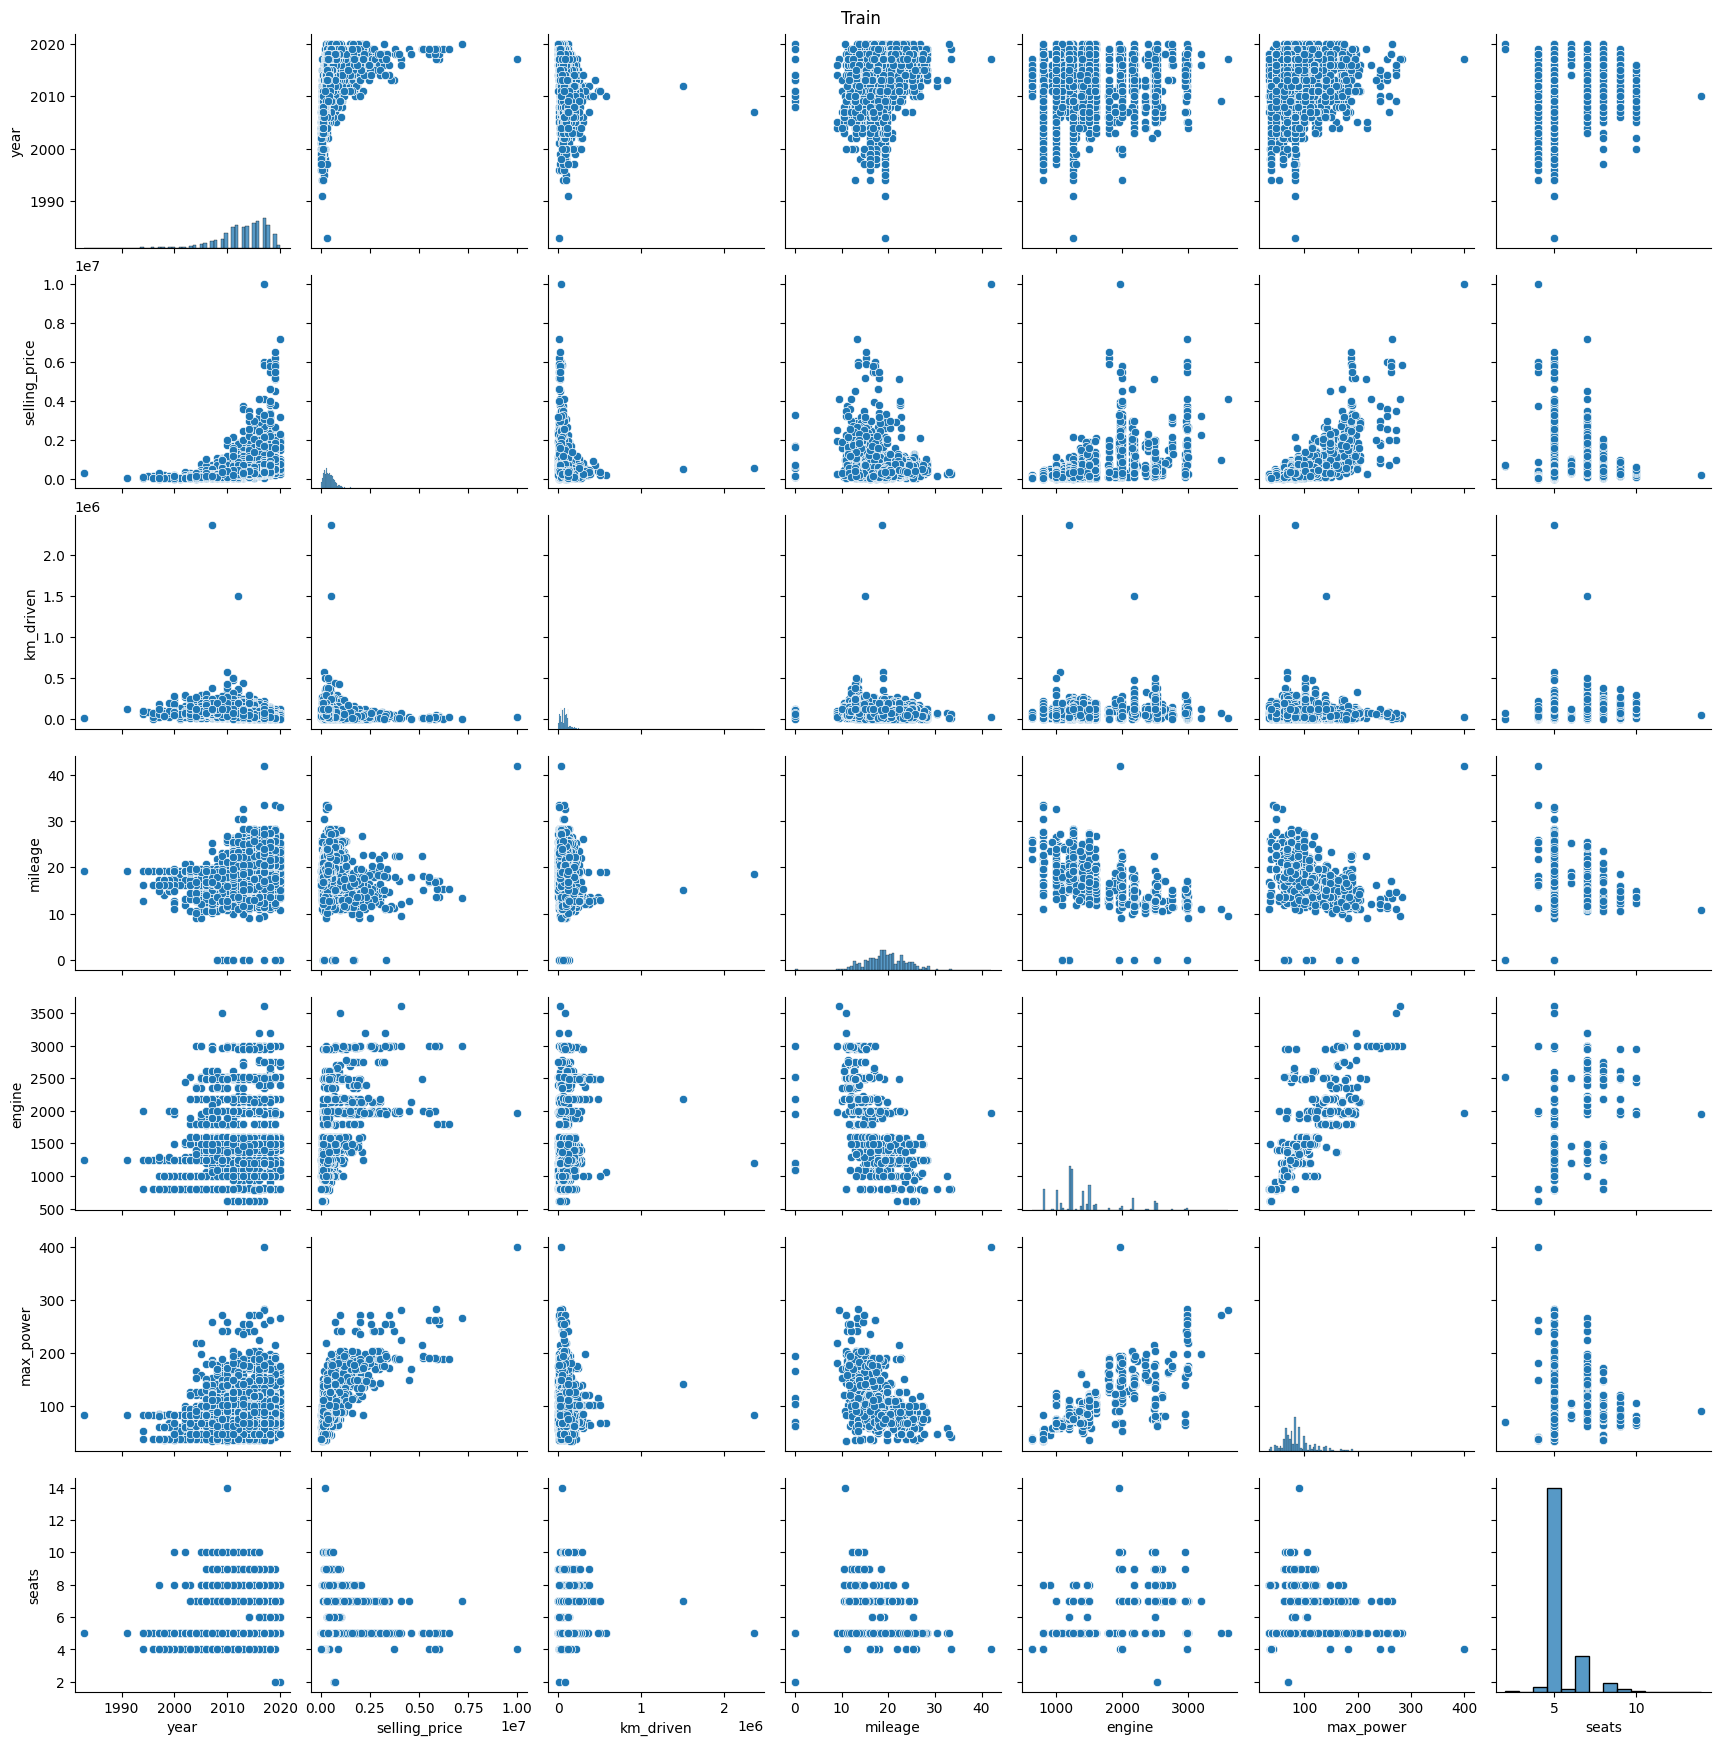

In [120]:
sns.pairplot(df_train.select_dtypes(['int', 'float']))
plt.suptitle("Train", y = 1)
plt.show()

По распределениям видим,что стоимость автомобиля  может линейно зависеть от максимальной мощности автомобиля. Также максимальная мощность (max_power) имеет высокую положительную корреляцию с общим объёмом всех цилиндров двигателя (engine).


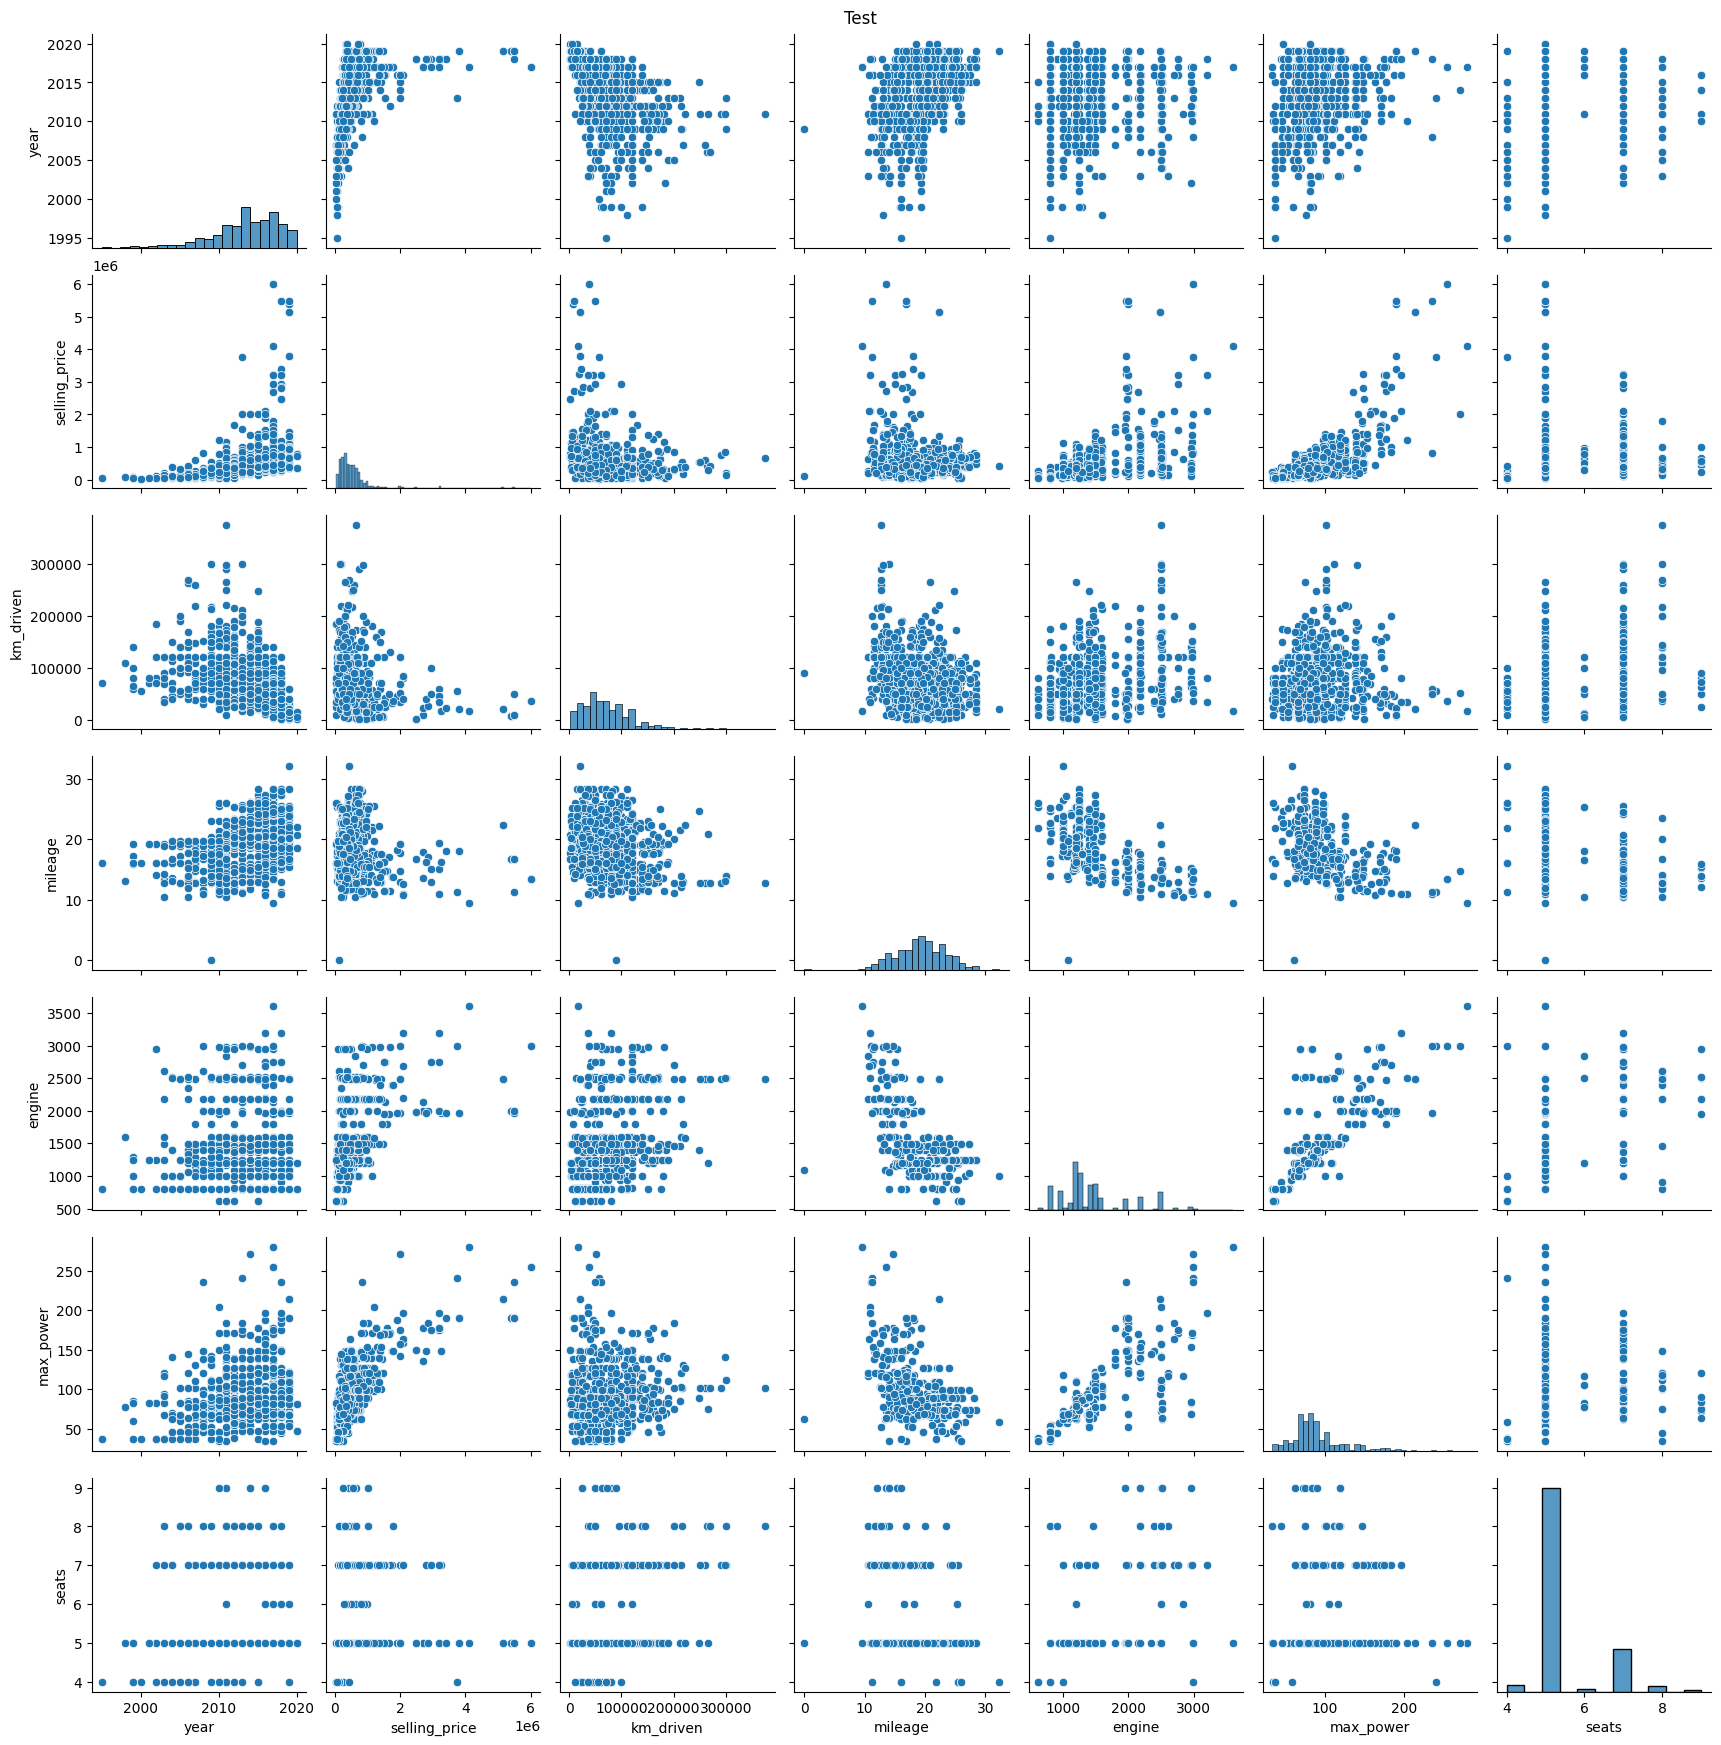

In [121]:
sns.pairplot(df_test.select_dtypes(['int', 'float']))
plt.suptitle("Test", y = 1)
plt.show()

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


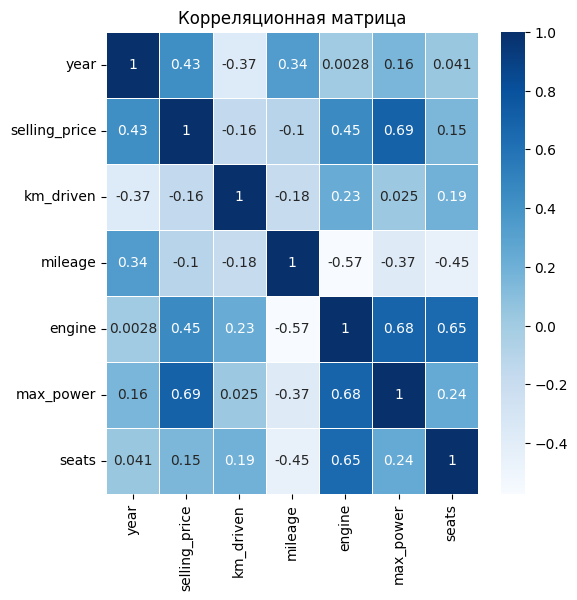

In [122]:
cor = df_train.select_dtypes(include=['float', 'int']).corr()

plt.figure(figsize=(6, 6))
sns.heatmap(cor, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой 'year' и 'engine'. Между 'selling_price' и 'max_power' наблюдается довольно сильная положительная линейная зависимость. Опираясь на данные, нельзя утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Так как коэффицент корреляции довольно маленький, чтобы делать такое такое высказывание.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [29]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [123]:
df_train_copy = df_train.select_dtypes(include = ['int', 'float']).copy()
y_train = df_train_copy['selling_price']
X_train = df_train_copy.drop(columns = ['selling_price'], axis = 1)

In [124]:
assert X_train.shape == (5840, 6)

In [125]:
df_test_copy = df_test.select_dtypes(include = ['int', 'float']).copy()
y_test = df_test_copy['selling_price']
X_test = df_test_copy.drop(columns = ['selling_price'], axis = 1)

In [128]:
assert X_test.shape == (1000, 6)


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: r2 = {r2_train}, MSE = {mse_train}")
print(f"Test: r2 = {r2_test}, MSE = {mse_test}")

Train: r2 = 0.593214521620734, MSE = 116600313590.75081
Test: r2 = 0.5946598097210027, MSE = 233001116120.28818


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
model.fit(X_train_scaler, y_train)
y_train_pred = model.predict(X_train_scaler)
y_test_pred = model.predict(X_test_scaler)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: r2 = {r2_train}, MSE = {mse_train}")
print(f"Test: r2 = {r2_test}, MSE = {mse_test}")

Train: r2 = 0.5932145216207348, MSE = 116600313590.75055
Test: r2 = 0.594659809721017, MSE = 233001116120.28006


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [131]:
X_train.columns[abs(model.coef_).argmax()]

'max_power'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [132]:
from sklearn.linear_model import Lasso

y_train_lasso = y_train.copy()
y_test_lasso = y_test.copy()
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaler, y_train)
y_train_pred_lasso = lasso.predict(X_train_scaler)
y_test_pred_lasso = lasso.predict(X_test_scaler)

r2_train = r2_score(y_train, y_train_pred_lasso)
mse_train = MSE(y_train, y_train_pred_lasso)

r2_test = r2_score(y_test, y_test_pred_lasso)
mse_test = MSE(y_test, y_test_pred_lasso)

print(f"Train: r2 = {r2_train}, MSE = {mse_train}")
print(f"Test: r2 = {r2_test}, MSE = {mse_test}")

Train: r2 = 0.5932145215854115, MSE = 116600313600.87555
Test: r2 = 0.5946586434768635, MSE = 233001786510.72232


In [133]:
lasso.coef_

array([152311.61785248, -44055.68325022,  29279.55772591,  59323.17112391,
       324472.90497563, -22163.87507359])

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [39]:
from sklearn.model_selection import GridSearchCV



In [40]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [41]:
from sklearn.linear_model import ElasticNet

# your code here

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [134]:
df_train_copy2 = df_train.copy()
df_train_copy2 = df_train_copy2.drop(columns = [ 'name'], axis = 1)
df_test_copy2 = df_test.copy()
df_test_copy2 = df_test_copy2.drop(columns = ['name'], axis = 1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [136]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df_train_copy2 = pd.get_dummies(df_train_copy2, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)
df_test_copy2 = pd.get_dummies(df_test_copy2, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [137]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

y_train_ridge = df_train_copy2['selling_price']
X_train = df_train_copy2.drop(columns = ['selling_price'], axis = 1)

y_test_ridge = df_test_copy2['selling_price']
X_test = df_test_copy2.drop(columns = ['selling_price'], axis = 1)

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

ridge = Ridge()
params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}
grid = GridSearchCV(ridge, params, cv=10, scoring = 'r2')
grid.fit(X_train_scaler, y_train_ridge)
best_alpha = grid.best_params_['alpha']

y_pred_train_ridge = grid.predict(X_train_scaler)
y_pred_test_ridge = grid.predict(X_test_scaler)

r2_train = r2_score(y_train_ridge, y_pred_train_ridge)
r2_test = r2_score(y_test_ridge, y_pred_test_ridge)

mse_train = MSE(y_train_ridge, y_pred_train_ridge)
mse_test = MSE(y_train_ridge, y_pred_train_ridge)

print(f"Лучший коэффициент регуляризации alpha: {best_alpha}")
print(f"Train: r2 = {r2_train}, MSE = {mse_train}")
print(f"Test: r2 = {r2_test}, MSE = {mse_test}")

Лучший коэффициент регуляризации alpha: 10
Train: r2 = 0.6498855723956513, MSE = 100356217763.63309
Test: r2 = 0.6196078212845242, MSE = 100356217763.63309


Да, удалось заметно улучшить mse и незначительно r2

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [139]:
def business_metric(y_true, y_pred):
    delta = abs(y_pred - y_true)
    ten_percent = 0.1 * y_true
    N = (delta <= ten_percent).sum()
    return N / len(y_true)


business_metric_ridge_train = business_metric(y_train_ridge, y_pred_train_ridge)
business_metric_ridge_test = business_metric(y_test_ridge, y_pred_test_ridge)
print(f"Ridge model: train, test = {business_metric_ridge_train, business_metric_ridge_test}")

business_metric_lasso_train = business_metric(y_train_lasso, y_train_pred_lasso)
business_metric_lasso_test = business_metric(y_test_lasso, y_test_pred_lasso)
print(f"Lasso model: train, test = {business_metric_lasso_train, business_metric_lasso_test}")


Ridge model: train, test = (0.2107876712328767, 0.239)
Lasso model: train, test = (0.21335616438356164, 0.224)


Из тех, что я использовал, лучше всего себя показала ridge. На test выборке показатели бизнес метрики лучше на порядок, чем на train. Поэтому берем ridge model как лучшую модель

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [140]:
from joblib import dump

data_of_model = {
    "model": grid.best_estimator_,
    "scaler": scaler,
    "best_alpha": best_alpha,
}

dump(data_of_model, "ridge.joblib")

['ridge.joblib']

In [141]:
!pip install fastapi uvicorn
!sudo apt install nodejs npm
!npm install -g localtunnel
!pip install python-multipart

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
npm is already the newest version (8.5.1~ds-1).
nodejs is already the newest version (12.22.9~dfsg-1ubuntu3.6).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

changed 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [142]:
!npx localtunnel --port 8000 --subdomain fastapi

your url is: https://fastapi.loca.lt
y
^C


In [153]:
%%writefile main.py

from fastapi import FastAPI, File, UploadFile
from pydantic import BaseModel
from typing import List
from joblib import load
import pandas as pd
from io import StringIO
import io
import re
import numpy as np
from fastapi.responses import StreamingResponse

app = FastAPI()
model = load('ridge.joblib')["model"]

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

class DataPreprocessing:
    def __init__(self, data):
        self.data = pd.DataFrame([data]) if isinstance(data, dict) else data

    def data_cleaning(self):

        if "torque" in self.data.columns:
            self.data = self.data.drop(columns=["torque"], axis=1)

        for col in ["mileage", "engine", "max_power"]:
            if col in self.data.columns:
                self.data[col] = self.data[col].apply(lambda x: re.sub(r"[^\d.]+", "", str(x)))

        for col in ["mileage", "engine", "max_power"]:
            if col in self.data.columns:
                self.data[col] = self.data[col].apply(lambda x: np.nan if len(str(x)) <= 1 else float(x))

        for col in ["mileage", "engine", "max_power", "seats"]:
            if col in self.data.columns:
                median = self.data[col].median()
                self.data[col] = self.data[col].fillna(median)

        for col in ["engine", "seats"]:
            if col in self.data.columns:
                self.data[col] = self.data[col].astype(int)

        return self

    def ohe(self):
        categorical_columns = ["fuel", "seller_type", "transmission", "owner"]
        for col in categorical_columns:
            if col in self.data.columns:
                self.data = pd.get_dummies(self.data, columns=[col], drop_first=True)
        return self.data

def create_csv_response(dataframe: pd.DataFrame, filename: str = "output.csv"):
    csv_buffer = StringIO()
    dataframe.to_csv(csv_buffer, index=False)
    csv_buffer.seek(0)

    response = StreamingResponse(csv_buffer, media_type="text/csv")
    response.headers["Content-Disposition"] = f"attachment; filename={filename}"
    return response


@app.post("/predict_item")
def predict_item(item: Item):
    data = item.dict()
    preprocessing = DataPreprocessing(data)
    formatted_data = preprocessing.data_cleaning().ohe()
    prediction = model.predict(formatted_data)
    return {"Predicted car price": prediction.tolist()}


@app.post("/predict_items")
async def predict_csv(file: UploadFile = File(...)):
    contents = await file.read()
    df = pd.read_csv(io.BytesIO(contents))
    preprocessing = DataPreprocessing(df)
    formatted_data = preprocessing.data_cleaning().ohe()
    predictions = model.predict(formatted_data)
    df["predicted_price"] = predictions
    return create_csv_response(df, filename="predictions_output.csv")

Writing main.py


In [154]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.229.74.128your url is: https://fastapi.loca.lt
INFO:     Started server process [48283]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [48283]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



первый кот -> @sabrina_sadiekh